In [966]:
import Dataset as d
import numpy as np
import Scrapped_datasets as v
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import seaborn as sns
from fbprophet import Prophet
from xgboost import plot_importance
from matplotlib import pyplot
import importlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
#country_data[~country_data.country.isin(list(data.country.unique()))].country.index
importlib.reload(d)
importlib.reload(v)

<module 'Scrapped_datasets' from '/Users/kelvin/sf19_ds16/Projects/Causes of Death/Scrapped_datasets.py'>

In [1084]:
hiv_data = d.hiv_data
issue = 'new_infections'
year = 'year'
group = 'continent'
population = 'country'
years_to_predict = 5
amount_of_countries = 3
since = 2002
prediction = 'prediction'
model = ElasticNet()
#xgb.XGBRegressor(objective="reg:squarederror")
hiv_data.shape

(6468, 12)

In [993]:
#Merge HIV data and Country INFO
data, cont, income = d.merge_data_pop(hiv_data)
print('data: ', data.shape)
print('continent: ', cont.shape)
print('income: ', income.shape)
#Add prediction label and separate into train, train label, and test
x,y,e = d.train_label_test(data, issue, years_to_predict)
print('\nx: ', x.shape)
print('y: ', y.shape)
print('e: ', e.shape)
#Regression for each group
final_data = d.predict_regression(x, y, e, model, since, years_to_predict, "country")
print('\nfinal_data: ', final_data.shape)

data:  (5544, 13)
continent:  (700, 12)
income:  (196, 12)

x:  (4554, 245)
y:  (4554,)
e:  (990, 245)

final_data:  (2574, 17)


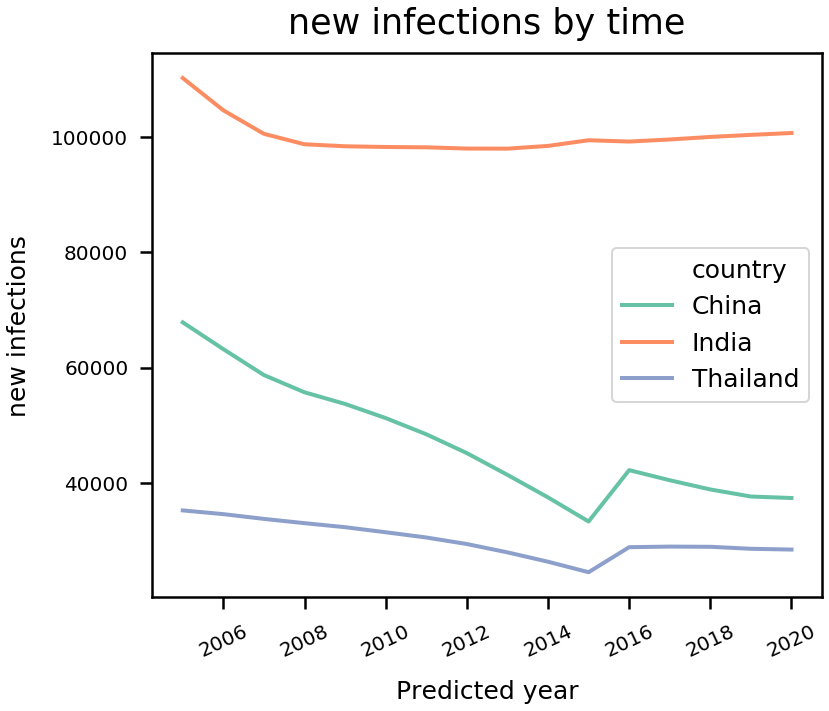

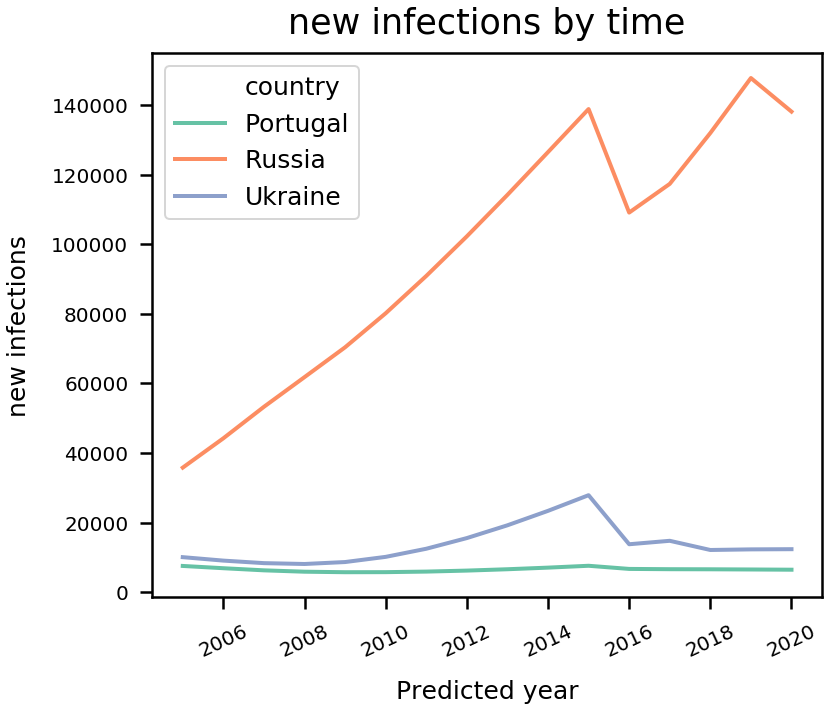

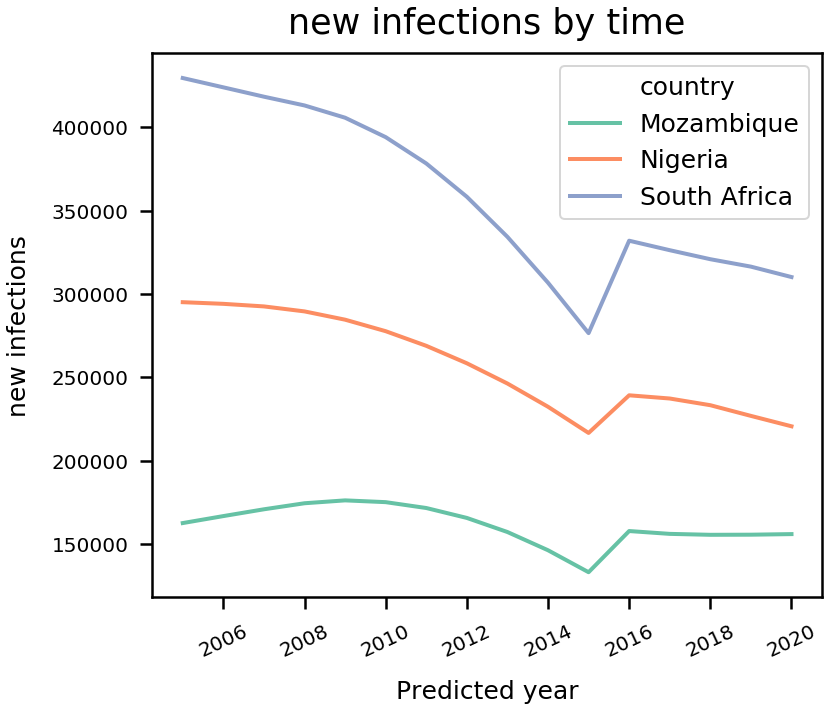

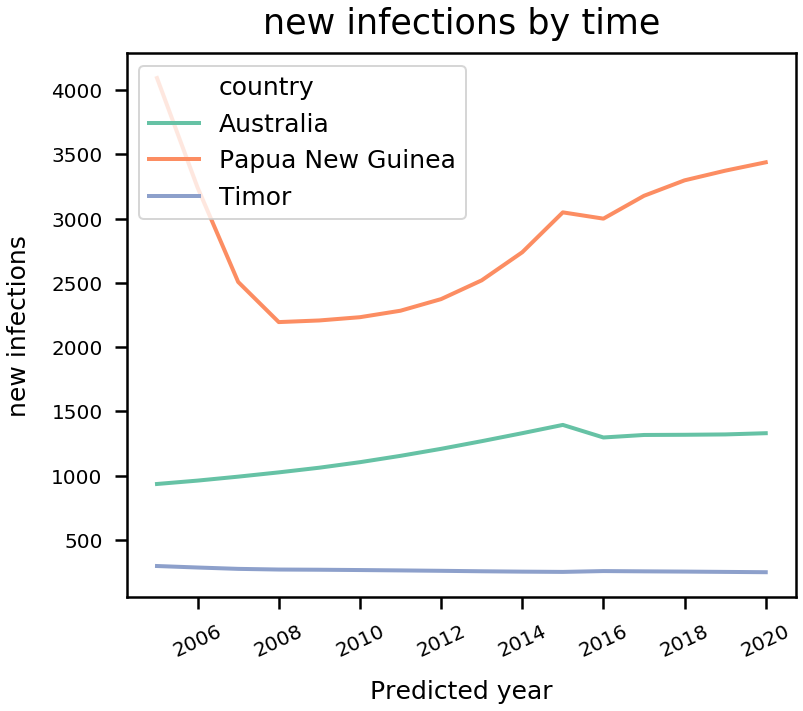

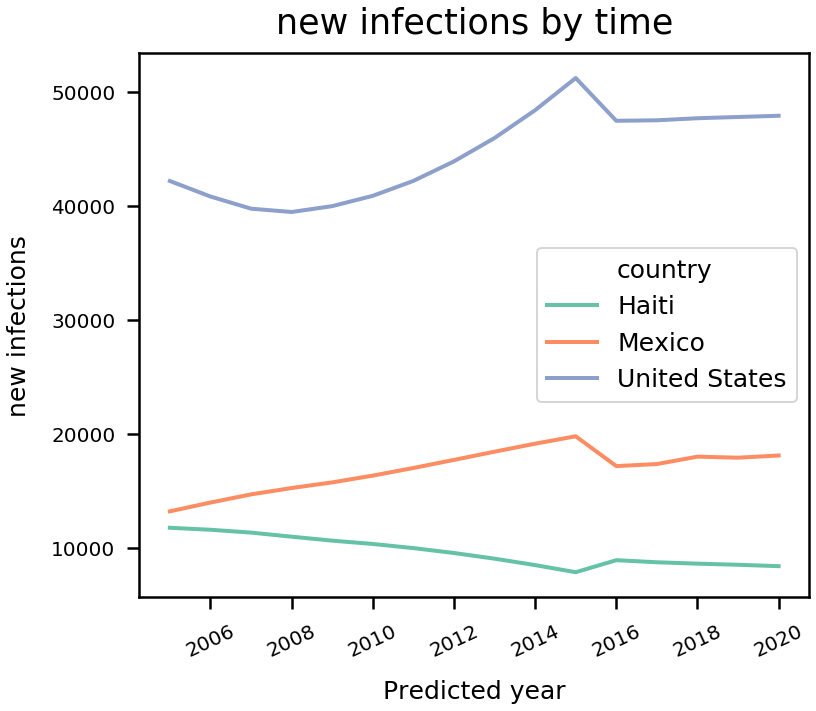

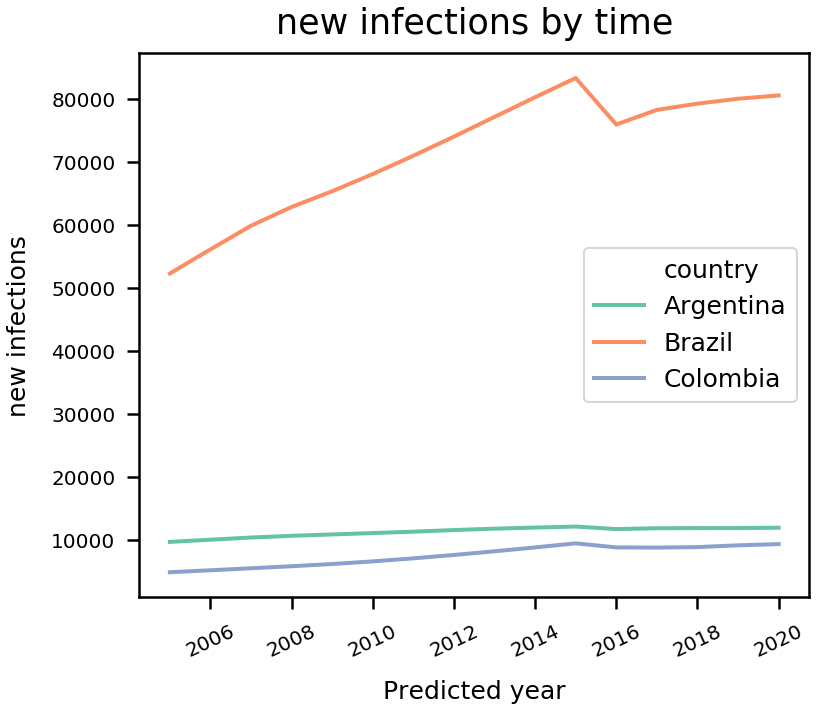

In [997]:
importlib.reload(d)
importlib.reload(v)
#Regression for each group
final_data_1 = d.predict_regression(x, y, e, model, since, years_to_predict, "country")
d.plot_time_group(final_data_1, issue, prediction, 3, 3, group, 'country')

In [995]:
final_data = final_data_1

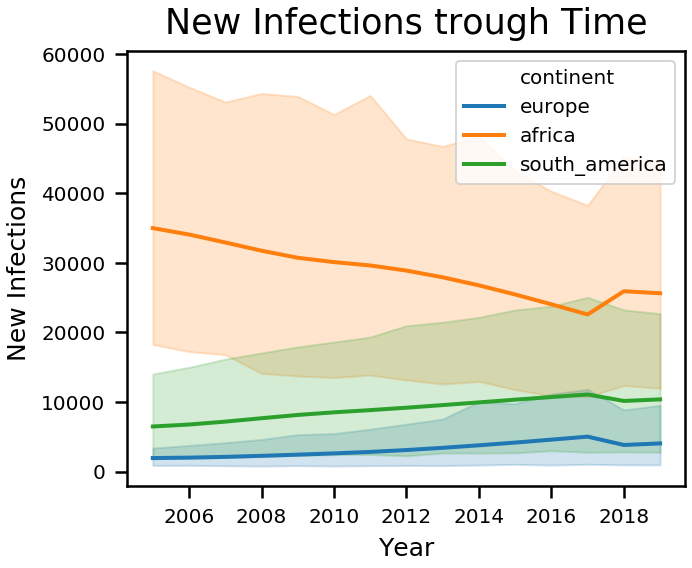

In [969]:
importlib.reload(d)
importlib.reload(v)
#####CONTINENTS
final_plot = final_data[(final_data["year_predicted"] >= 2005) & (final_data["year_predicted"] <= 2019)]
final_plot_cont = final_plot[(final_plot["continent"] != "oceania") & (final_plot["continent"] != "asia") & (final_plot["continent"] != "north_america")]
d.plot_time(final_plot_cont, prediction, years_to_predict, 'continent')

In [242]:
top_countries = d.top_countries_list(final_data, group, amount_of_countries)


In [243]:
preds = d.predict_regression_prophet(data, issue, years_to_predict, top_countries, 'country')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 21.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 21.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 21.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run pr

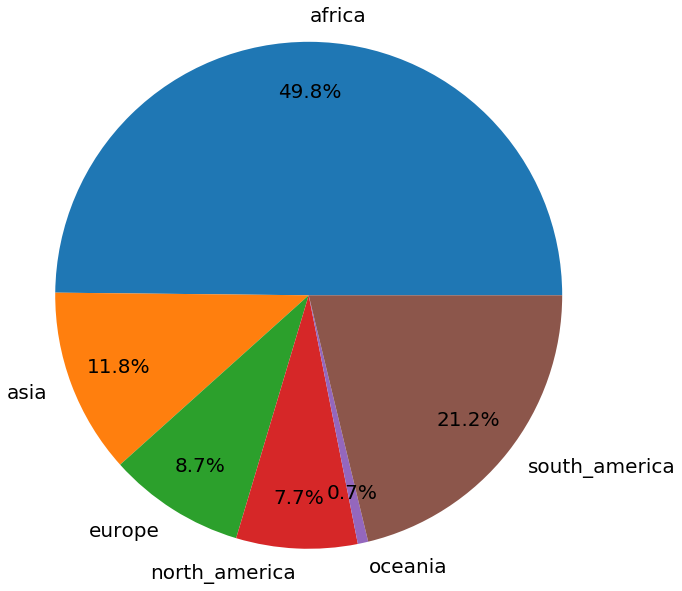

In [958]:
final_data_2005_2020 = final_data[(final_data["year_predicted"] >= 2015) & (final_data["year_predicted"] <= 2019)]
data_continent = final_data_2005_2020.groupby("continent")["prediction"].mean().reset_index()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
ax = plt.subplot()
# Data to plot
labels = 'africa', 'asia', 'europe', 'north_america', 'oceania', 'south_america'
sizes = data_continent.prediction
explode=(0.1,0)  # explode 1st slice

# Plot
ax.pie(sizes ,labels=labels, 
       autopct='%1.1f%%', textprops={'fontsize': 20}, pctdistance=0.8)
#plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
###plt.setp(autotexts, size=8, weight="bold")


plt.axis('equal')
plt.show()

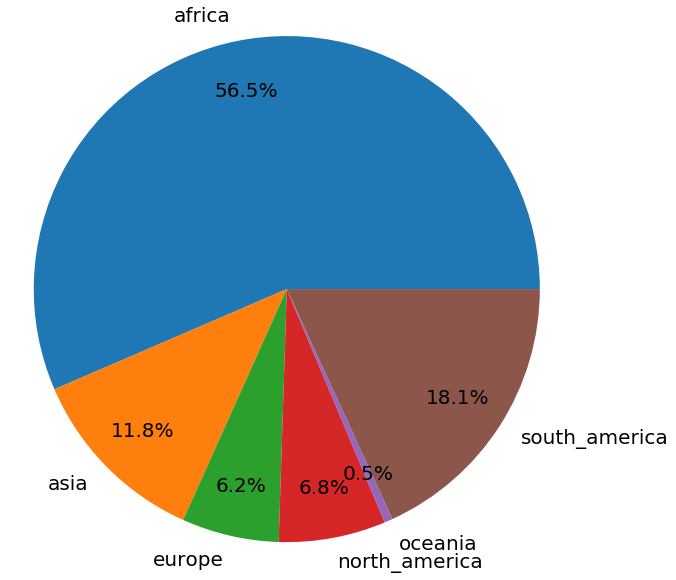

In [959]:
final_data_2005_2020 = final_data[(final_data["year_predicted"] >= 2010) & (final_data["year_predicted"] <= 2014)]
data_continent = final_data_2005_2020.groupby("continent")["prediction"].mean().reset_index()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
ax = plt.subplot()
# Data to plot
labels = 'africa', 'asia', 'europe', 'north_america', 'oceania', 'south_america'
sizes = data_continent.prediction
explode=(0.1,0)  # explode 1st slice

# Plot
ax.pie(sizes ,labels=labels, 
       autopct='%1.1f%%', textprops={'fontsize': 20}, pctdistance=0.8)
#plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
###plt.setp(autotexts, size=8, weight="bold")


plt.axis('equal')
plt.show()

### PLOT BAR CONTINENT

In [950]:
final_data_2009_2014 = final_data[(final_data["year_predicted"] >= 2009) & (final_data["year_predicted"] <= 2014)]
final_data_2015_2019 = final_data[(final_data["year_predicted"] >= 2015) & (final_data["year_predicted"] <= 2019)]


data_continent2014 = final_data_2009_2014.groupby("continent")["prediction"].mean().reset_index()
data_continent2019 = final_data_2005_2020.groupby("continent")["prediction"].mean().reset_index()
# data_continent2014.plot.bar()
# data_continent2019.plot.bar()
merge_cont = pd.concat([data_continent2014, data_continent2019], axis=1)

In [952]:
merge_cont=merge_cont.iloc[:, 1:]

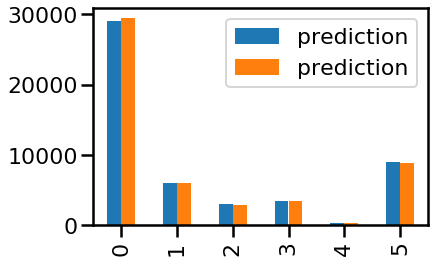

In [954]:
merge_cont.plot.bar()

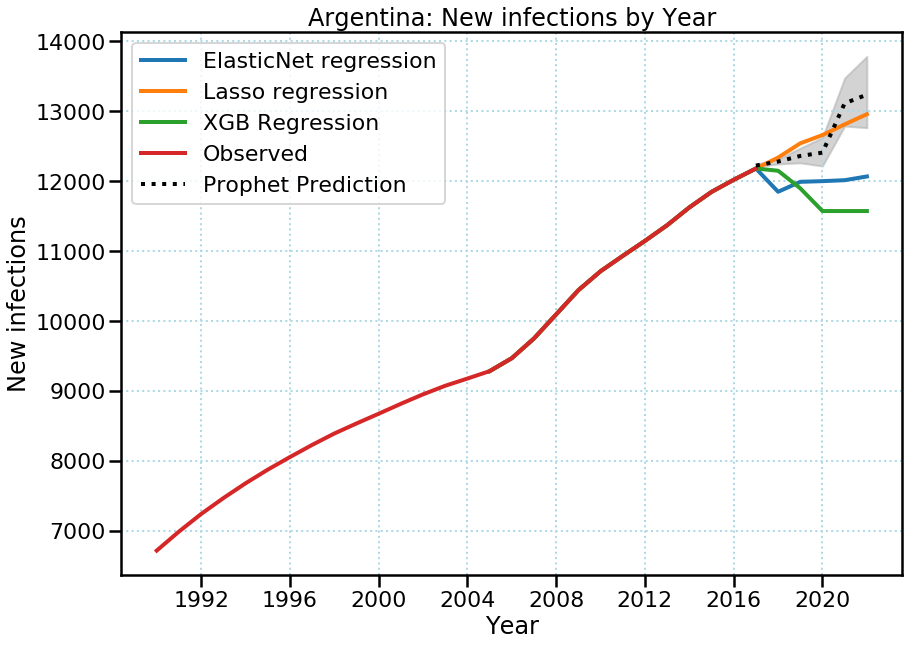

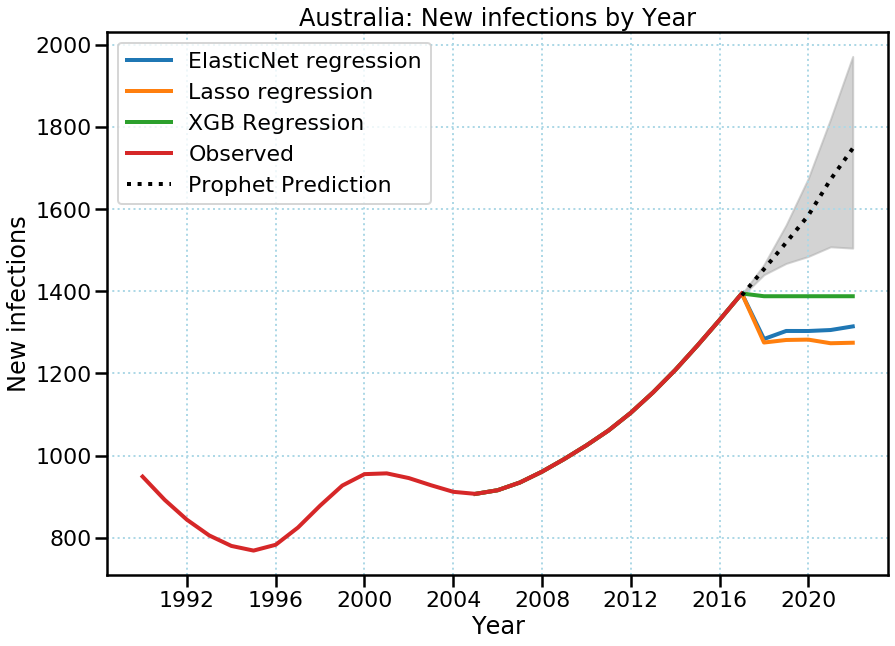

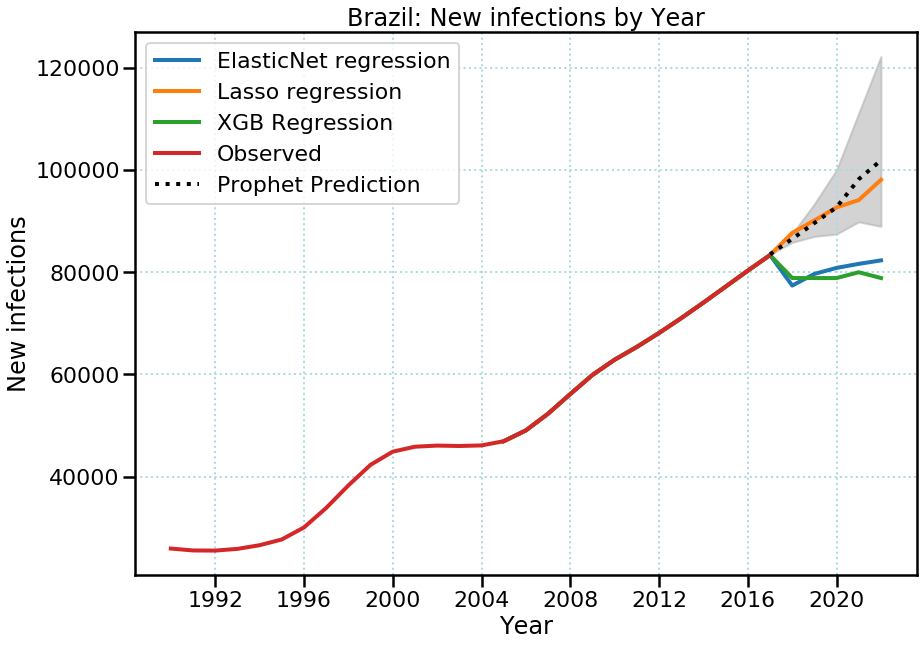

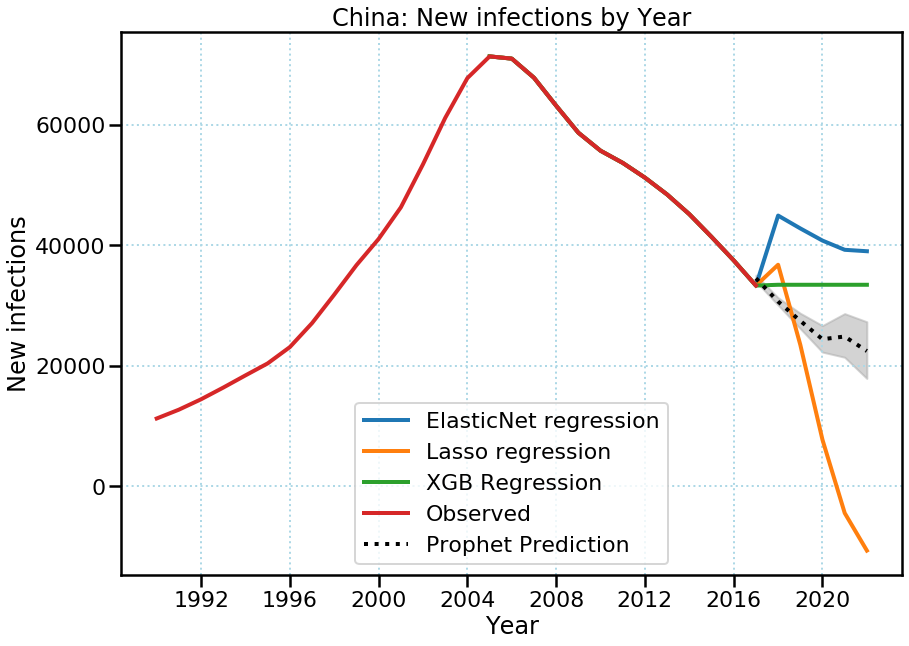

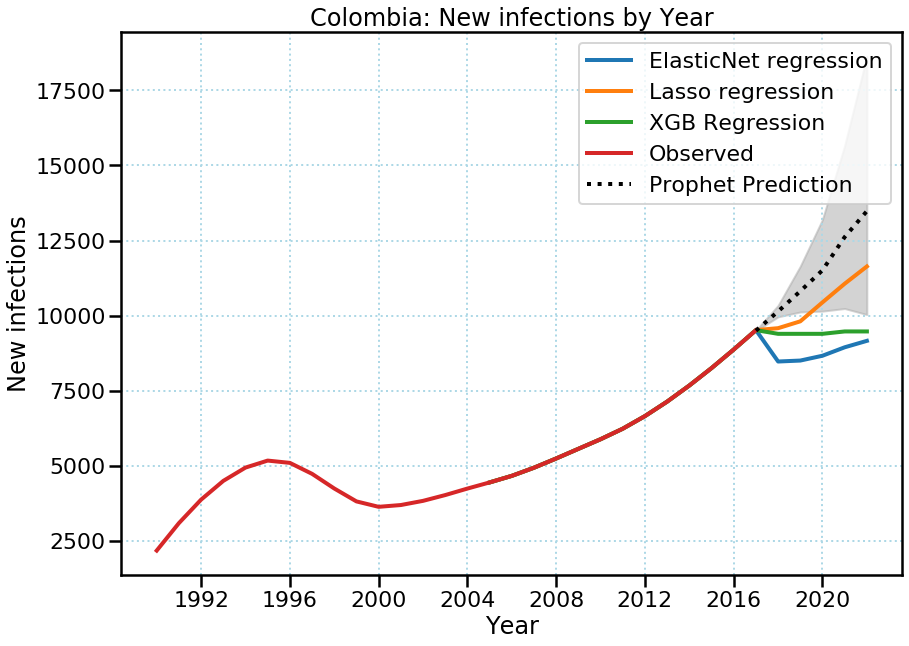

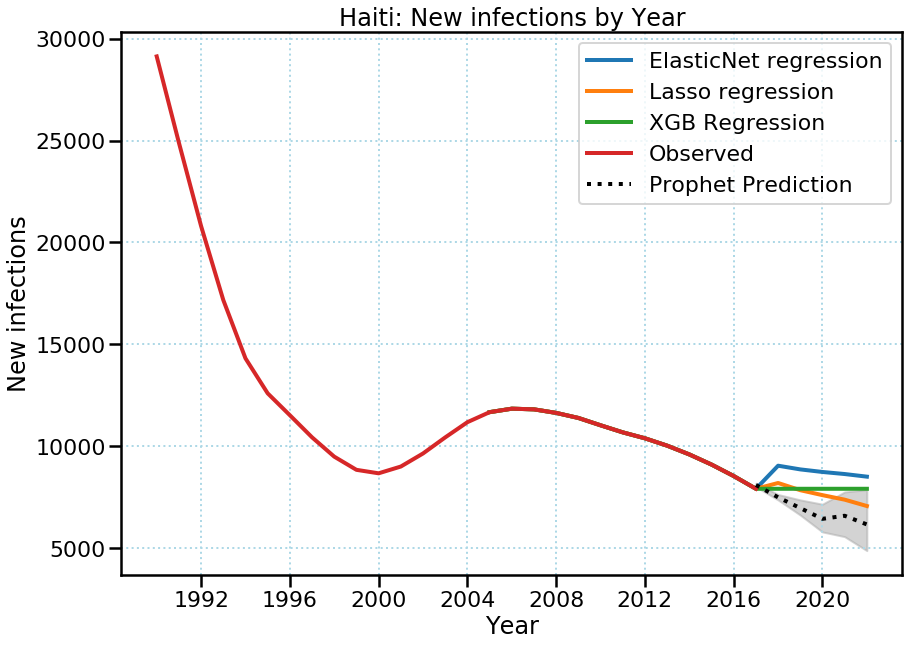

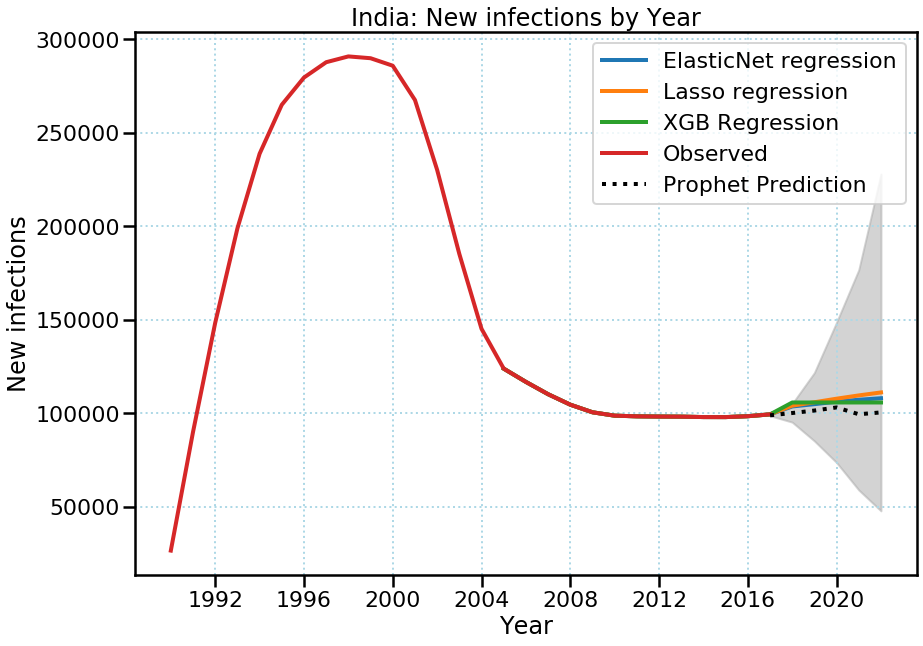

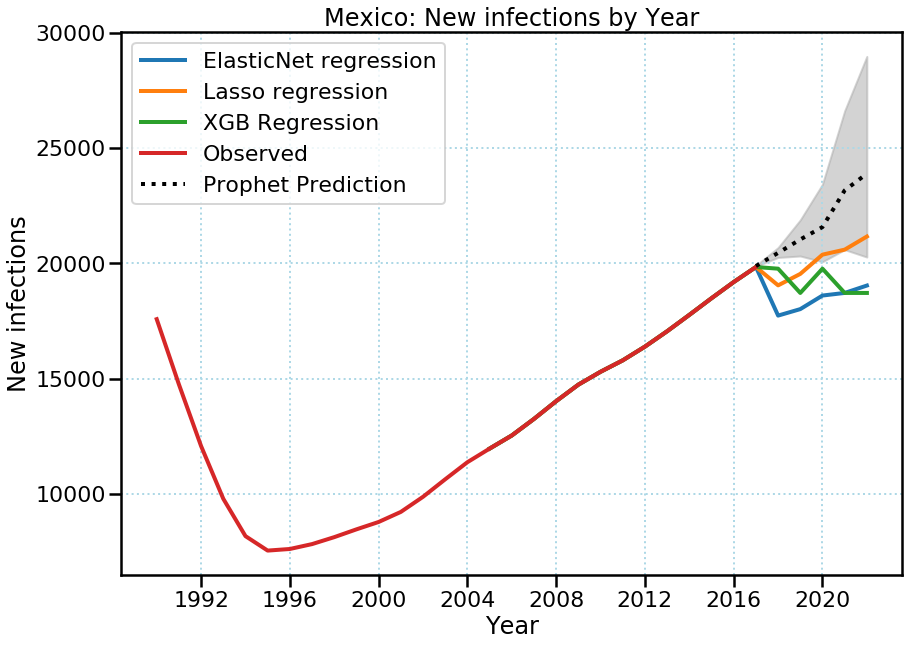

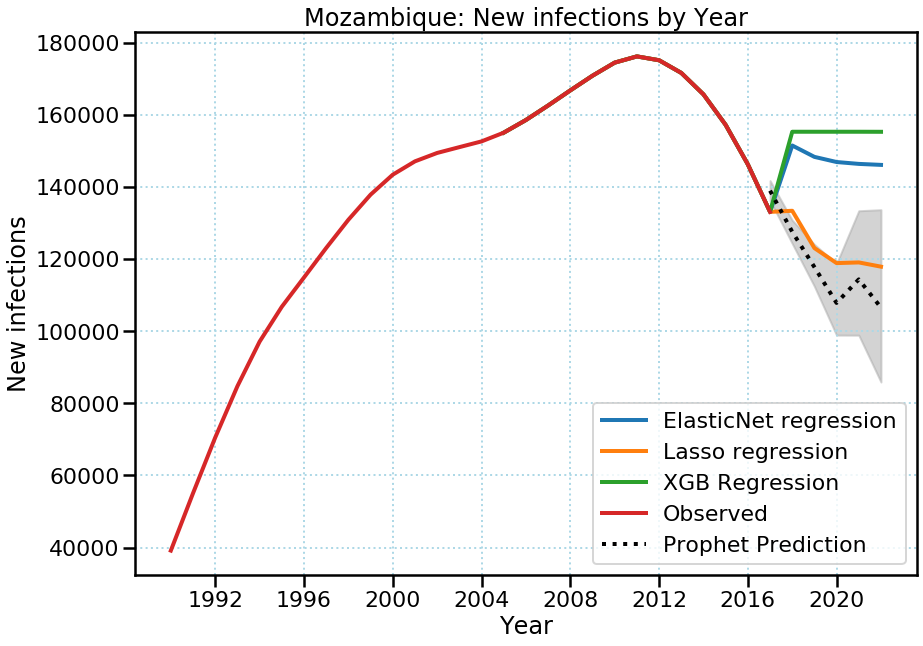

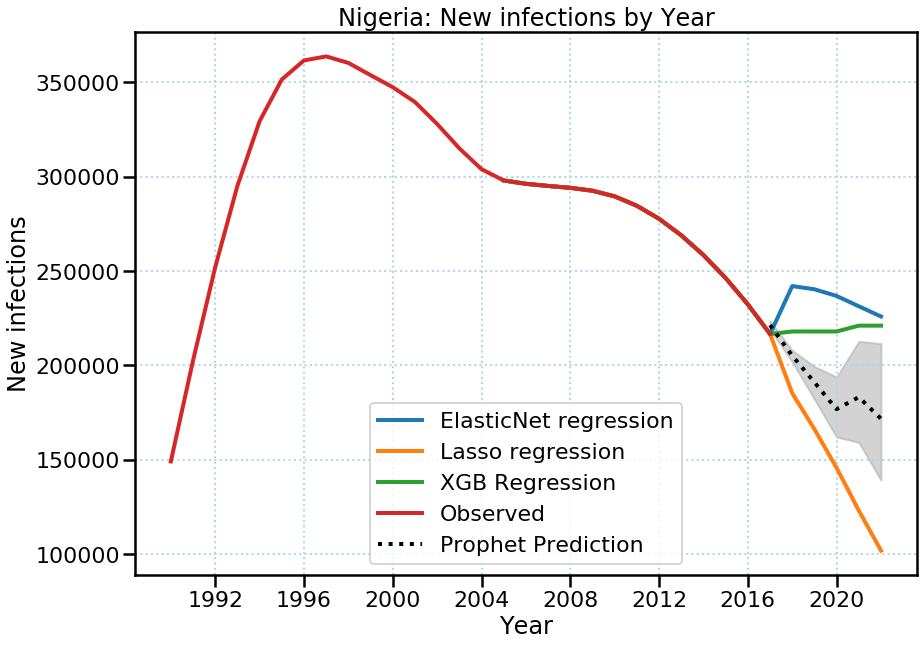

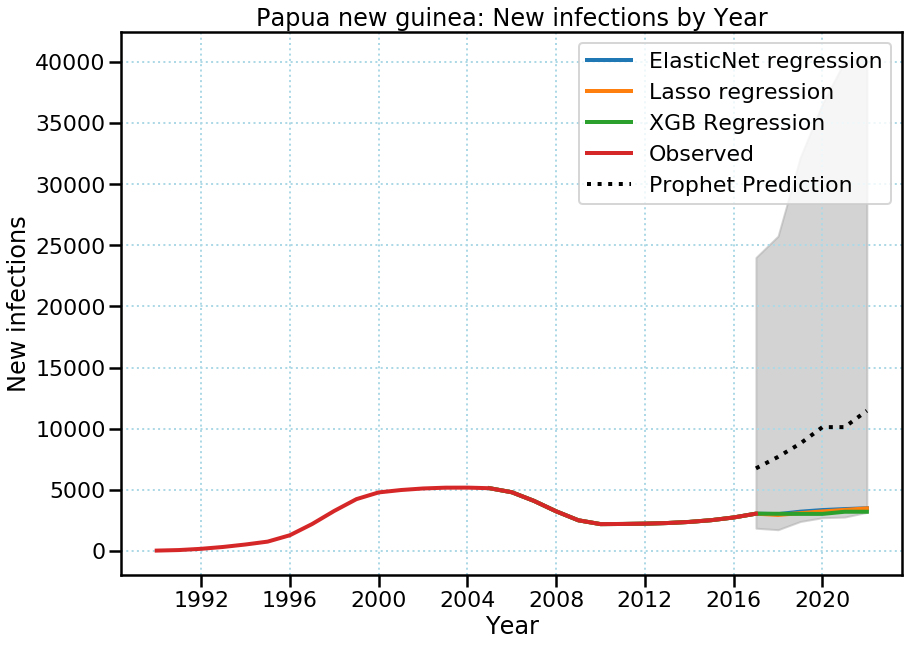

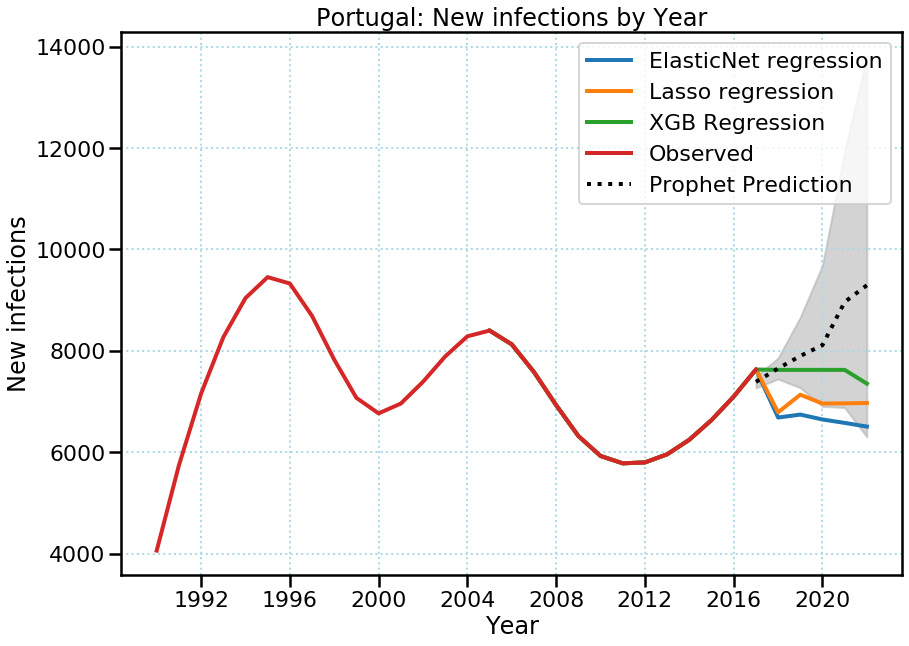

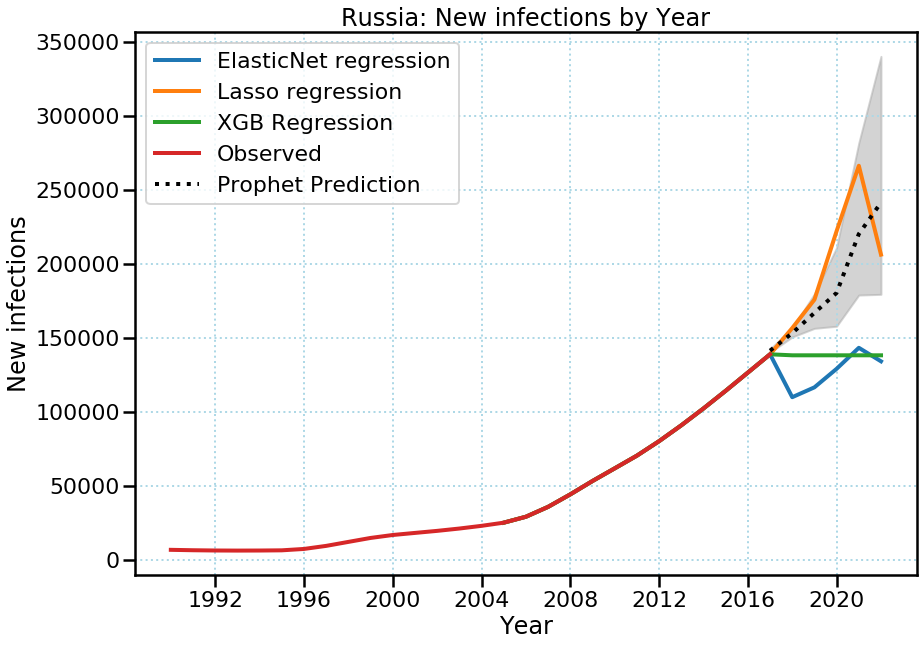

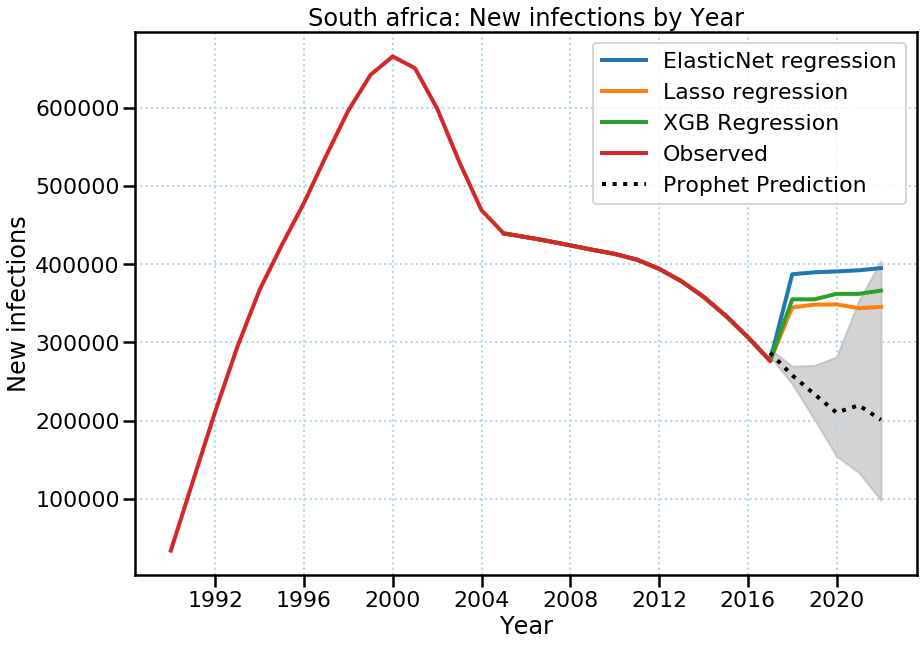

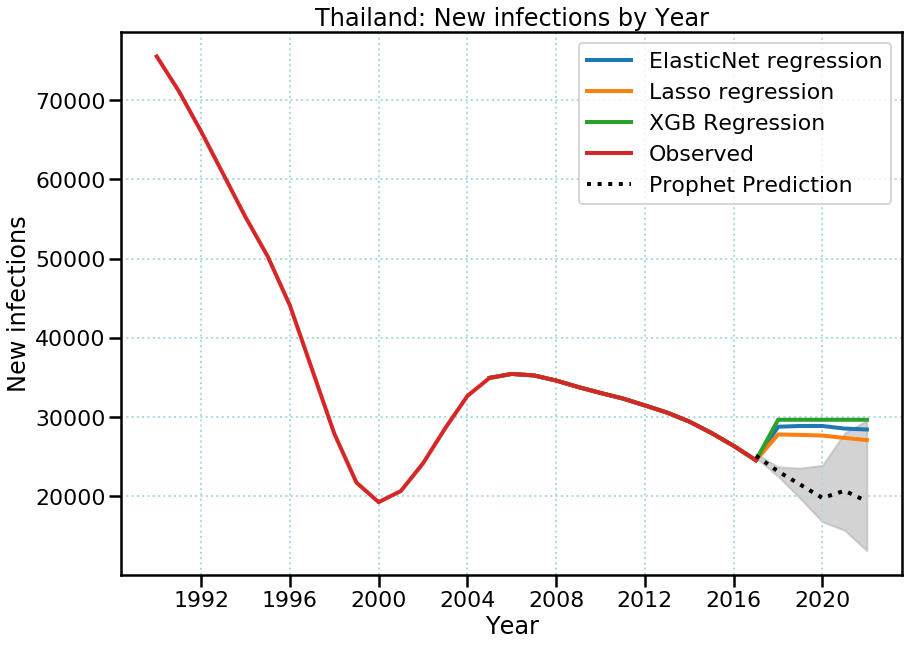

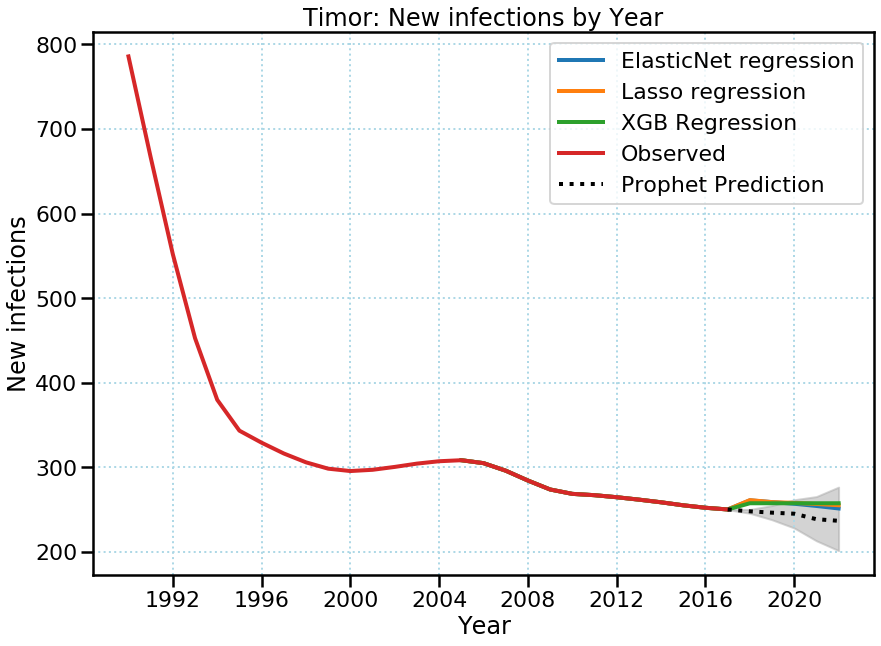

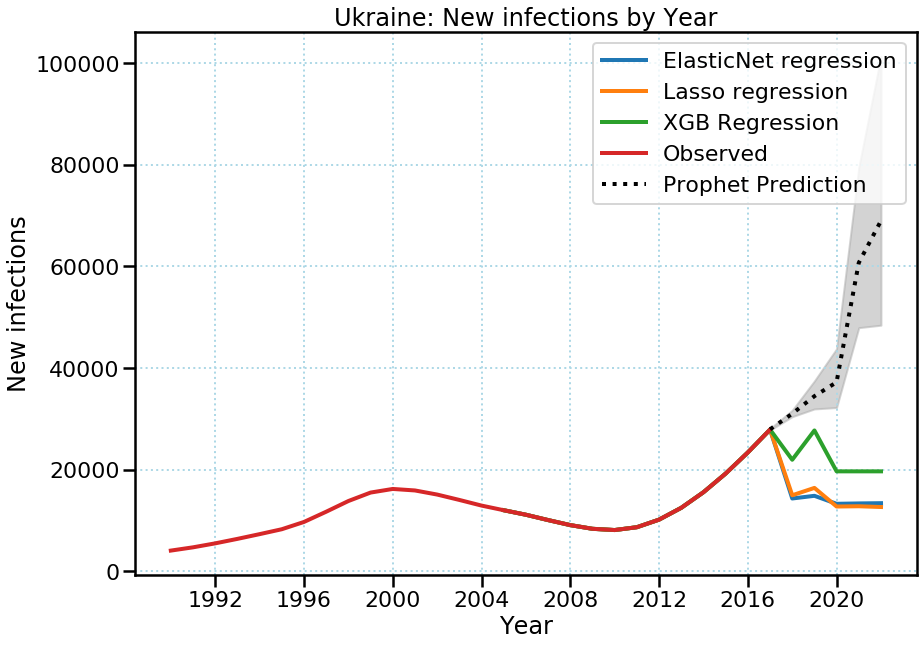

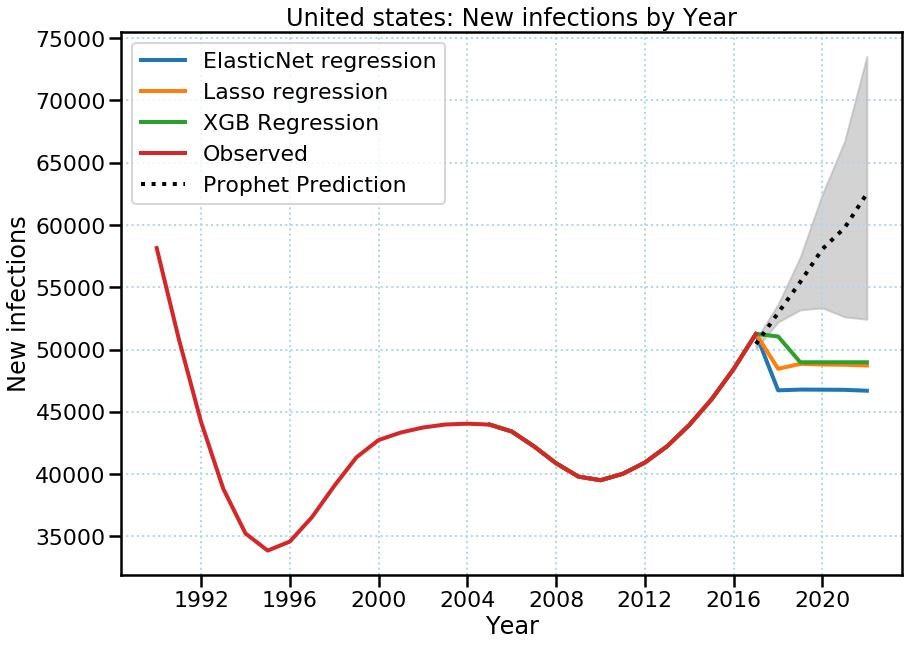

In [245]:
d.plot_prophet_and_regression(preds, final_data, 'new_infections', 'country', prediction, model)

In [ ]:
hiv_data = d.hiv_data
issue = 'death'
year = 'year'
group = 'continent'
population = 'country'
years_to_predict = 4
since = 1996
prediction = 'prediction'
model = ElasticNet()
#Regression for each group
x,y,e = d.train_label_test(data, issue, years_to_predict)
final_data = d.predict_regression(x, y, e, model, since, years_to_predict, "country")
d.plot_time_group(final_data, issue, prediction, years_to_predict, 5, group, 'country')

In [ ]:
hiv_data = d.hiv_data
issue = 'living_with_hiv'
year = 'year'
group = 'continent'
population = 'country'
years_to_predict = 4
since = 1996
prediction = 'prediction'
model = ElasticNet()
#Regression for each group
x,y,e = d.train_label_test(data, issue, years_to_predict)
final_data = d.predict_regression(x, y, e, model, since, years_to_predict, "country")
d.plot_time_group(final_data, issue, prediction, years_to_predict, 5, group, 'country')

## Brazil & Mexico

In [661]:
# brazil_data = data[data["country"]=="Brazil"]
# brazil_data.drop(['country','continent'], axis=1, inplace=True)
# mexico_data = data[data["country"]=="Mexico"]
# mexico_data.drop(['country','continent'], axis=1, inplace=True)

In [1096]:
mexico_data = data[data["country"]=="Mexico"]
brazil_data = data[data["country"]=="Brazil"]
mex_bra_data = pd.concat([mexico_data, brazil_data], axis=0)

In [1097]:
mex_bra_data["ranked_year"] = mex_bra_data.groupby('country')["year"].rank()

In [1098]:
def train_label_test(data, column, years):
    #### MERGED DB
    merged = data.copy()
    #### NEXT YEAR
    new_column = column + "1"
    #### WHAT YEARS
    what_years = list(merged.year.unique())[-years:]
    ### WANT NEXT INFECTIONS
    merged[new_column] = merged.groupby("country")[column].shift(-years)
    ### COUNTRY DUMMIES
    country_dummies = pd.get_dummies(merged["country"])
    ##YEAR DUMMIES
    #year_dummies = pd.get_dummies(merged["year"])

    if 'continent' in merged.columns:
        continent_dummies = pd.get_dummies(merged["continent"])
        ### MERGING COUNTRIES TO DB
        merged = pd.concat([merged, continent_dummies, country_dummies], axis=1)
    else:
        merged = pd.concat([merged, country_dummies], axis=1)
    ###TEST SET 2017
    test_merged = merged[merged["year"].isin(what_years)]
    ###TRAIN SET NOT 2017
    train_merged = merged[~merged["year"].isin(what_years)]
    ###TRAIN LABEL
    train_label = train_merged[new_column]
    ### Drop next infections TRAIN
    train_merged.drop([new_column], axis=1, inplace=True)
    ### Drop next infections TEST
    test_merged.drop([new_column], axis=1, inplace=True)
    return train_merged, train_label, test_merged

In [1106]:
countries = ["Brazil", "Mexico"]
def filtered_datasets(data, country):
    child = d.children_orphaned
    ar_cov = d.antiretroviral_coverage
    ar_cov = ar_cov.rename({"Year": "year", 'Entity':'country'}, axis=1)
    gdp_merged = d.merge_data_gdp(data)
    orphan = child[child["Entity"].isin(country)]
    orphan = orphan.rename({"Year": "year", 'Entity':'country'}, axis=1)
    ar_coverage = ar_cov[ar_cov["country"].isin(country)]
    dataset = gdp_merged.merge(ar_coverage, how='left', on=['year','country'])
    dataset = dataset.merge(orphan, how='left', on=['year','country'])
    dataset.drop(["Code_x", "Code_y"], axis=1, inplace=True)
    return dataset
dataset = filtered_datasets(mex_bra_data, countries)
dataset = dataset.iloc[:, :-1]
dataset

,country,year,death,new_infections,living_with_hiv,hiv_age_15_49,"hiv_under_5(per_100,000)","hiv_all_ages(per_100,000)","hiv_70+(per_100,000)","hiv_age_5_14(per_100,000)","hiv_age_15_49(per_100,000)","hiv_age_50_69(per_100,000)",continent,ranked_year,gdp,(% of people living with HIV)
0,Mexico,1990,2058.441,17576.015,33178.904,0.071,1.083,2.409,0.332,0.236,3.710,4.027,north_america,1.0,2.610000e+11,NaN
1,Mexico,1991,2548.388,14751.271,44778.337,0.094,1.101,2.922,0.348,0.276,4.596,4.486,north_america,2.0,3.130000e+11,NaN
2,Mexico,1992,3124.942,12077.453,55750.648,0.114,1.188,3.510,0.406,0.275,5.518,5.521,north_america,3.0,3.630000e+11,NaN
3,Mexico,1993,3769.644,9790.072,65575.160,0.131,1.187,4.147,0.424,0.359,6.567,6.242,north_america,4.0,5.010000e+11,NaN
4,Mexico,1994,4104.992,8171.454,73658.855,0.143,1.038,4.429,0.405,0.361,7.069,6.480,north_america,5.0,5.280000e+11,NaN
5,Mexico,1995,4658.795,7544.991,79355.559,0.151,1.227,4.935,0.412,0.301,7.909,6.907,north_america,6.0,3.600000e+11,NaN
6,Mexico,1996,5084.180,7614.704,82776.209,0.154,1.204,5.296,0.400,0.313,8.494,7.293,north_america,7.0,4.110000e+11,NaN
7,Mexico,1997,4851.430,7826.763,84933.287,0.154,1.408,4.975,0.361,0.316,7.912,6.552,north_america,8.0,5.000000e+11,NaN
8,Mexico,1998,5050.793,8127.799,86370.547,0.154,2.717,5.104,1.226,0.402,7.744,6.404,north_america,9.0,5.270000e+11,NaN
9,Mexico,1999,5147.943,8465.415,87726.549,0.153,2.482,5.129,1.498,0.381,7.745,6.742,north_america,10.0,6.000000e+11,NaN


In [1107]:
x,y,e = d.train_label_test(dataset, issue, years_to_predict)
print('\nx: ', x.shape)
print('y: ', y.shape)
print('e: ', e.shape)


x:  (46, 48)
y:  (46,)
e:  (10, 48)


In [1108]:
x.columns

Index([                       'country',                           'year',
                                'death',                 'new_infections',
                      'living_with_hiv',                  'hiv_age_15_49',
             'hiv_under_5(per_100,000)',      'hiv_all_ages(per_100,000)',
                 'hiv_70+(per_100,000)',      'hiv_age_5_14(per_100,000)',
           'hiv_age_15_49(per_100,000)',     'hiv_age_50_69(per_100,000)',
                            'continent',                    'ranked_year',
                                  'gdp', ' (% of people living with HIV)',
                        'north_america',                  'south_america',
                                   1990,                             1991,
                                   1992,                             1993,
                                   1994,                             1995,
                                   1996,                             1997,
                         

In [1136]:
model_xgb = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=1000)
def predict_regression(x, y, e, model, since, years_to_predict, by_group=None):
    model_lasso = Lasso()
    model_ridge = Ridge()
    if by_group:
        #Stacks group: dataframe
        #Merges X, Y
        data = pd.concat([x, y], axis=1)
        #Dictionary group: prediction
        final_datasets = {}
        for group in x[by_group].unique():
            x_variable = pd.DataFrame(data[data[by_group] == group])
            x_variable = x_variable[x_variable["year"] >= since]
            x_variable = x_variable.drop([by_group], axis=1)
            test_var = pd.DataFrame(e[e[by_group] == group])
            test_var = test_var[test_var["year"] >= since]
            test_var = test_var.drop([by_group], axis=1)
            if by_group == "country":
                x_variable = x_variable.drop('continent', axis=1)
                test_var = test_var.drop('continent', axis=1)
            if by_group == "continent":
                x_variable = x_variable.drop('country', axis=1)
                test_var = test_var.drop('country', axis=1)
            #x and y variables
            x_var = x_variable.iloc[:, :-1]
            x_var_short = x_variable.iloc[:, :14]
            x_var_short.drop(['hiv_age_15_49',
             'hiv_under_5(per_100,000)',      'hiv_all_ages(per_100,000)',
                 'hiv_70+(per_100,000)',      'hiv_age_5_14(per_100,000)',
           'hiv_age_15_49(per_100,000)',     'hiv_age_50_69(per_100,000)'], axis=1, inplace=True)
            test_var_short = test_var.iloc[:, :14]
            test_var_short.drop(['hiv_age_15_49',
             'hiv_under_5(per_100,000)',      'hiv_all_ages(per_100,000)',
                 'hiv_70+(per_100,000)',      'hiv_age_5_14(per_100,000)',
           'hiv_age_15_49(per_100,000)',     'hiv_age_50_69(per_100,000)'], axis=1, inplace=True)
            y_var = x_variable.iloc[:, -1]
            ### X + E
            e_shape = test_var.shape[0]
            merge_x_e = pd.concat([x_var_short, test_var_short], axis=0)
            scale = StandardScaler()
            merge_xe_scaled = pd.DataFrame(scale.fit_transform(merge_x_e), columns=merge_x_e.columns)
            x_scaled_ = merge_xe_scaled.iloc[:-e_shape, :]
            e_scaled_ = merge_xe_scaled.iloc[-e_shape:, :]

            x_train, x_test, y_train, y_test = train_test_split(x_scaled_, y_var, test_size=0.10)
            ####FIT
            model.fit(x_train, y_train)
            prediction = model.predict(e_scaled_)
            #Stacking prediction to variables
            x_var["prediction"] = y_var
            test_var["prediction"] = prediction
            ## LASSO
            model_lasso.fit(x_train, y_train)
            lasso = model_lasso.predict(e_scaled_)
            x_var["lasso"] = y_var
            test_var["lasso"] = lasso
            ## RIDGE
            model_ridge.fit(x_train, y_train)
            ridge = model_lasso.predict(e_scaled_)
            x_var["ridge"] = y_var
            test_var["ridge"] = ridge
            ######
            #merge_xe_scaled = pd.DataFrame(scale.fit_transform(merge_x_e), columns=merge_x_e.columns)
            x_scaled_ = merge_x_e.iloc[:-e_shape, :]
            e_scaled_ = merge_x_e.iloc[-e_shape:, :]

            x_train, x_test, y_train, y_test = train_test_split(x_scaled_, y_var, test_size=0.10)
            
            ## XGB
            model_xgb.fit(x_train, y_train)
            xgb = model_xgb.predict(e_scaled_)
            x_var["xgb"] = y_var
            test_var["xgb"] = xgb
            

            merged_back = pd.concat([x_var, test_var], axis=0)
            if by_group == "continent":
                #Gets columns to merge back df
                columns = merged_back.iloc[:, :13]
                continents1 = merged_back.iloc[:, 13:15].idxmax(axis=1).rename("continent")
                years = merged_back.iloc[:, 15:42].idxmax(axis=1).rename("year")
                countries = merged_back.iloc[:, 34:35].idxmax(axis=1).rename("country")
                prediction = merged_back.iloc[:, -4]
                lasso = merged_back.iloc[:, -3]
                ridge = merged_back.iloc[:, -2]
                xgb = merged_back.iloc[:, -1]
                #linear = merged_back.iloc[:, -1]
                future_year = pd.DataFrame(years + years_to_predict)["year"].rename("year_predicted")
                #Final dataset for each group. To dictionary, group: dataframe
                final_data = pd.concat([countries, continents1, prediction, future_year, lasso, ridge, xgb, years, columns], axis=1)
                final_datasets[group] = final_data
            if by_group == "country":
                columns = merged_back.iloc[:, :14]
                continents1 = merged_back.iloc[:, 14:16].idxmax(axis=1).rename("continent")
                years = merged_back.iloc[:, 16:44].idxmax(axis=1).rename("year1")
                countries = merged_back.iloc[:, 44:46].idxmax(axis=1).rename("country")
                prediction = merged_back.iloc[:, -4]
                lasso = merged_back.iloc[:, -3]
                ridge = merged_back.iloc[:, -2]
                xgb = merged_back.iloc[:, -1]
                #linear = merged_back.iloc[:, -1]
                future_year = pd.DataFrame(years + years_to_predict)["year1"].rename("year_predicted")
                # Final dataset for each group. To dictionary, group: dataframe
                final_data = pd.concat([countries, continents1, prediction, future_year, lasso, ridge, xgb, years, columns], axis=1)
                final_datasets[group] = final_data
        #Merge dataframes with predictions
        merge_final = pd.concat(final_datasets.values())
        merge_final = merge_final.sort_values(["country", "year1"])
        return merge_final


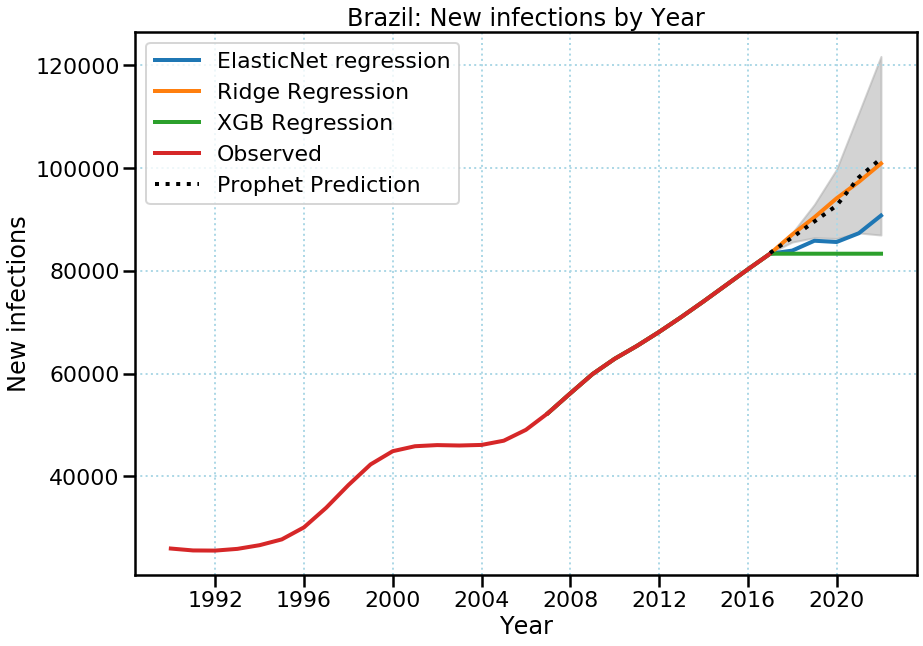

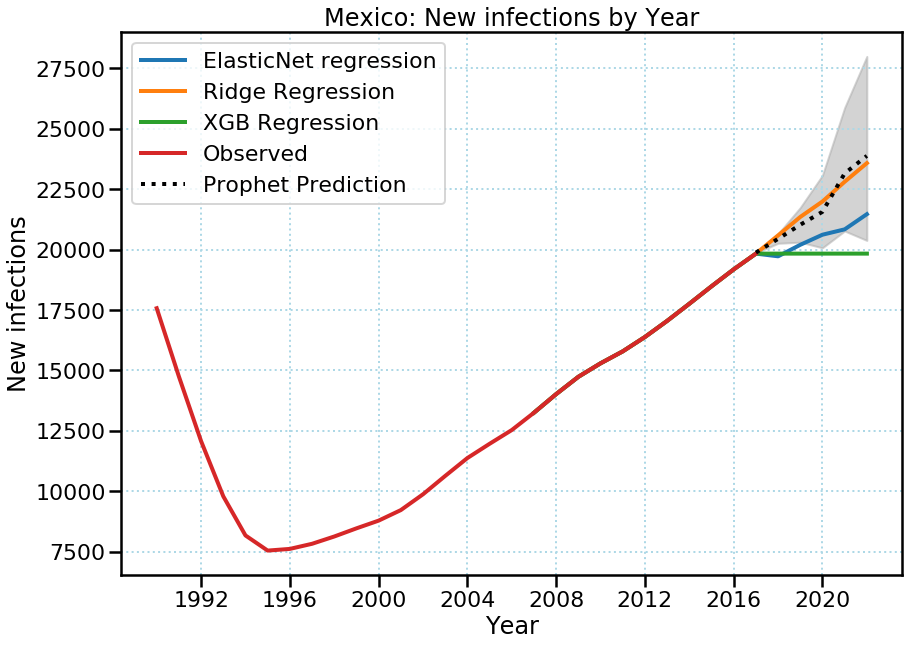

In [1137]:
final_data_12 = predict_regression(x, y, e, model, since, years_to_predict, "country")
#d.plot_time_group(final_data_12, issue, prediction, 3, 4, group, 'country')
plot_prophet_and_regression(preds, final_data_12, 'new_infections', 'country', prediction, model)

In [1080]:
final_data_12

,country,continent,prediction,year_predicted,lasso,ridge,xgb,year1,year,death,...,hiv_age_15_49,"hiv_under_5(per_100,000)","hiv_all_ages(per_100,000)","hiv_70+(per_100,000)","hiv_age_5_14(per_100,000)","hiv_age_15_49(per_100,000)","hiv_age_50_69(per_100,000)",ranked_year,gdp,(% of people living with HIV)
40,Brazil,south_america,52325.579000,2007,52325.579000,52325.579000,52325.579000,2002,2002,14539.642,...,0.329,6.828,8.123,1.373,0.891,11.286,8.446,13.0,5.080000e+11,31.0
41,Brazil,south_america,56155.509000,2008,56155.509000,56155.509000,56155.509000,2003,2003,14942.367,...,0.347,6.505,8.235,1.488,0.946,11.296,9.197,14.0,5.580000e+11,32.0
42,Brazil,south_america,59905.418000,2009,59905.418000,59905.418000,59905.418000,2004,2004,14593.659,...,0.364,5.849,7.937,1.573,0.844,10.894,8.989,15.0,6.690000e+11,34.0
43,Brazil,south_america,62884.891000,2010,62884.891000,62884.891000,62884.891000,2005,2005,14568.090,...,0.380,5.589,7.820,1.590,0.844,10.495,9.744,16.0,8.920000e+11,35.0
44,Brazil,south_america,65380.562000,2011,65380.562000,65380.562000,65380.562000,2006,2006,14410.314,...,0.394,5.237,7.637,1.589,0.770,10.214,9.683,17.0,1.110000e+12,33.0
45,Brazil,south_america,68102.866000,2012,68102.866000,68102.866000,68102.866000,2007,2007,14553.431,...,0.409,4.611,7.617,1.736,0.780,10.254,9.543,18.0,1.400000e+12,33.0
46,Brazil,south_america,71007.511000,2013,71007.511000,71007.511000,71007.511000,2008,2008,15042.930,...,0.424,4.389,7.779,1.874,0.811,10.370,10.104,19.0,1.700000e+12,33.0
47,Brazil,south_america,74041.613000,2014,74041.613000,74041.613000,74041.613000,2009,2009,15065.926,...,0.440,3.618,7.700,1.737,0.672,10.261,10.437,20.0,1.670000e+12,35.0
48,Brazil,south_america,77165.685000,2015,77165.685000,77165.685000,77165.685000,2010,2010,15292.554,...,0.455,3.702,7.727,2.013,0.676,10.158,10.668,21.0,2.210000e+12,38.0
49,Brazil,south_america,80289.276000,2016,80289.276000,80289.276000,80289.276000,2011,2011,15226.875,...,0.471,3.290,7.609,2.116,0.668,9.997,10.480,22.0,2.620000e+12,40.0


In [1081]:
top_countries = ["Brazil", "Mexico"]
preds = d.predict_regression_prophet(dataset, issue, years_to_predict, top_countries, 'country')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 21.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 21.


In [1082]:
def plot_prophet_and_regression(data_prophet, data_reg, issue, group, prediction, model):
    data = data_prophet
    for i in data[group].unique():
        data_country = data[data[group]==i]
        data_reg_country = data_reg[data_reg[group]==i]

        data_reg_country['ds'] = data_reg_country["year_predicted"].astype(str)
        data_reg_country['ds'] = pd.to_datetime(data_reg_country["ds"])
        data_reg_country = data_reg_country.set_index('ds')
        fig, ax1 = plt.subplots(figsize=(14, 10))
        issue = issue.replace("_", " ").capitalize()
        year = "Year"
        country = i.capitalize()
        #sns.lineplot(data=data_reg_country, y=prediction, x=list(dataset['predicted_year']),hue=hue, palette="Set2")

        ax1.grid(b=True, which='major', color='lightblue', linestyle='dotted')
        # FROM REG
        ax1.plot(data_reg_country[prediction])
        # LASSO
        #ax1.plot(data_reg_country['lasso'])
        # RIDGE
        ax1.plot(data_reg_country['ridge'])
        # RIDGE
        ax1.plot(data_reg_country['xgb'])
        
        # LINEAR
        #ax1.plot(data_reg_country['linear'])

        # FROM PROPHET
        ax1.plot(data_country.y)
        ax1.plot(data_country.yhat, color='black', linestyle=':')
        ax1.fill_between(data_country.index, data_country['yhat_upper'], data_country['yhat_lower'], alpha=0.5,
                         color='darkgray')
        ax1.set_title('{}: {} by {}'.format(country, issue, year))
        ax1.set_ylabel("{}".format(issue))
        ax1.set_xlabel('{}'.format(year))
        ax1.legend(("ElasticNet regression", "Ridge Regression", "XGB Regression", "Observed", "Prophet Prediction"))
        fig;
    return

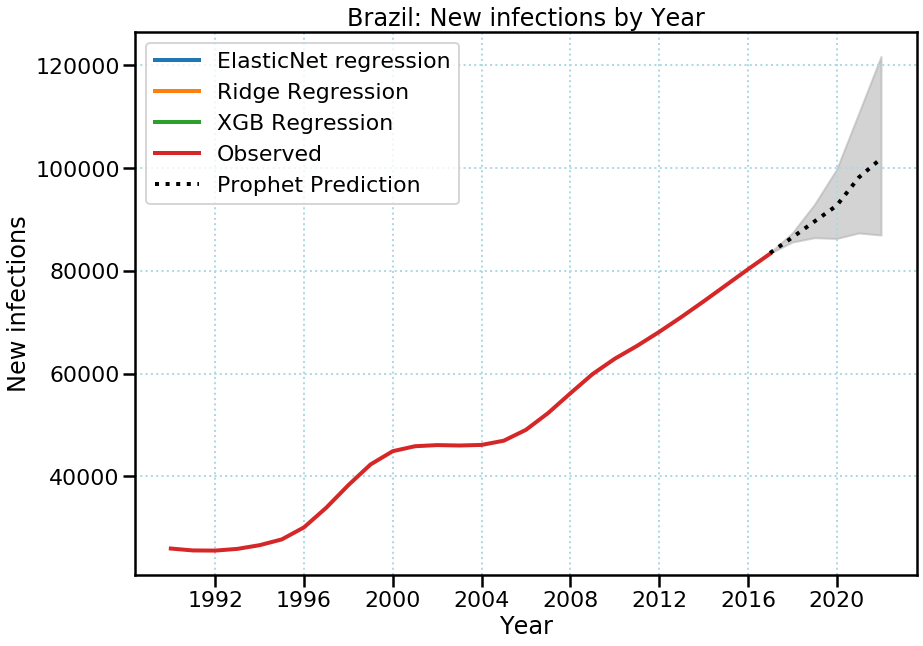

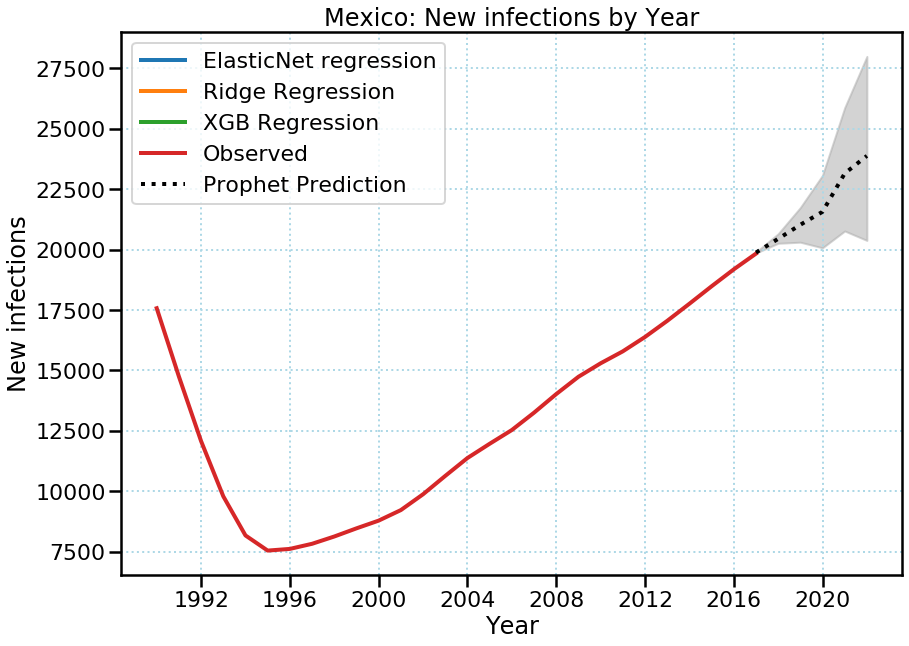

In [1105]:
plot_prophet_and_regression(preds, final_data_12, 'new_infections', 'country', prediction, model)

In [676]:
xx, yy, ee = train_label_test(dataset, issue, years_to_predict)
xx.drop(['country', 'continent'], axis=1, inplace=True)
ee.drop(['country', 'continent'], axis=1, inplace=True)

In [607]:
corr = xx.corr()
corr.style.background_gradient(cmap='coolwarm')
#### EIGENVALUES
corr = np.corrcoef(xx, rowvar=0)  # correlation matrix
w, v = np.linalg.eig(corr)        # eigen values & eigen vectors
xx.columns

,death,new_infections,living_with_hiv,hiv_age_15_49,"hiv_under_5(per_100,000)","hiv_all_ages(per_100,000)","hiv_70+(per_100,000)","hiv_age_5_14(per_100,000)","hiv_age_15_49(per_100,000)","hiv_age_50_69(per_100,000)",ranked_year,gdp,(% of people living with HIV),AIDS Orphans - 0-17 estimate (orphaned children),north_america,south_america,Brazil,Mexico
death,1,0.976763,0.933966,0.940741,0.798692,0.986562,0.451257,0.955581,0.957209,0.913035,0.0503611,0.335406,0.499647,0.956355,-0.997989,0.997989,0.997989,-0.997989
new_infections,0.976763,1,0.983673,0.984752,0.664201,0.93288,0.606902,0.87793,0.881491,0.963819,0.217113,0.523804,0.564767,0.873714,-0.966182,0.966182,0.966182,-0.966182
living_with_hiv,0.933966,0.983673,1,0.997146,0.535585,0.864876,0.707354,0.814687,0.796581,0.98605,0.328015,0.625233,0.584299,0.793529,-0.920023,0.920023,0.920023,-0.920023
hiv_age_15_49,0.940741,0.984752,0.997146,1,0.553553,0.87359,0.690446,0.827002,0.804012,0.986605,0.346443,0.602279,0.629069,0.80853,-0.926217,0.926217,0.926217,-0.926217
"hiv_under_5(per_100,000)",0.798692,0.664201,0.535585,0.553553,1,0.881025,-0.111383,0.883221,0.925088,0.502918,-0.453582,-0.235858,0.168233,0.927786,-0.820589,0.820589,0.820589,-0.820589
"hiv_all_ages(per_100,000)",0.986562,0.93288,0.864876,0.87359,0.881025,1,0.319687,0.975335,0.990919,0.841808,-0.0849087,0.199606,0.427147,0.985683,-0.989323,0.989323,0.989323,-0.989323
"hiv_70+(per_100,000)",0.451257,0.606902,0.707354,0.690446,-0.111383,0.319687,1,0.254611,0.212416,0.703881,0.703255,0.89467,0.557642,0.205962,-0.41642,0.41642,0.41642,-0.41642
"hiv_age_5_14(per_100,000)",0.955581,0.87793,0.814687,0.827002,0.883221,0.975335,0.254611,1,0.972886,0.794107,-0.152173,0.0839845,0.372222,0.982037,-0.964346,0.964346,0.964346,-0.964346
"hiv_age_15_49(per_100,000)",0.957209,0.881491,0.796581,0.804012,0.925088,0.990919,0.212416,0.972886,1,0.766468,-0.206783,0.0917341,0.3344,0.988462,-0.964931,0.964931,0.964931,-0.964931
"hiv_age_50_69(per_100,000)",0.913035,0.963819,0.98605,0.986605,0.502918,0.841808,0.703881,0.794107,0.766468,1,0.37289,0.621368,0.623211,0.767877,-0.89512,0.89512,0.89512,-0.89512


CV score:  nan
XGB Classifier: 99.47%
1515.770081656625


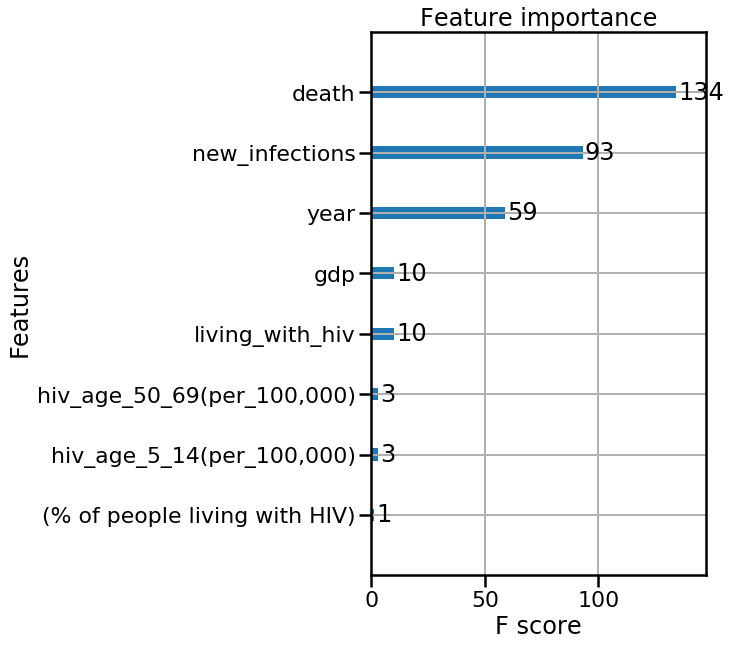

In [879]:
from sklearn.metrics import mean_squared_error, log_loss
xx, yy, ee = train_label_test(dataset, issue, years_to_predict)
xx.drop(['country', 'continent', 'Mexico', "south_america"], axis=1, inplace=True)
ee.drop(['country', 'continent', 'Mexico', "south_america"], axis=1, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.25)
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(x_train, y_train)
predict = model.predict(x_test)
score = model.score(x_test, y_test)
print("CV score: ", np.mean(cross_val_score(model, x_test, y_test, cv=4)))
print("XGB Classifier: %.2f%%" % (score * 100.0))
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(6, 10)
print(np.sqrt(mean_squared_error(y_test,predict)))
#print(log_loss(y_test, predict, labels=None))
pyplot.show()

In [880]:
xx.columns

Index(['year', 'death', 'new_infections', 'living_with_hiv', 'hiv_age_15_49',
       'hiv_under_5(per_100,000)', 'hiv_all_ages(per_100,000)',
       'hiv_70+(per_100,000)', 'hiv_age_5_14(per_100,000)',
       'hiv_age_15_49(per_100,000)', 'hiv_age_50_69(per_100,000)',
       'ranked_year', 'gdp', ' (% of people living with HIV)',
       'AIDS Orphans - 0-17 estimate (orphaned children)', 'north_america',
       'Brazil'],
      dtype='object')

In [605]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
reg = LassoCV(cv=5, random_state=0).fit(x_train, y_train)
reg.score(x_train, y_train)

0.9998373809127565

In [827]:
xx, yy, ee = train_label_test(dataset, issue, years_to_predict)
xx.drop(['country', 'continent', 'Mexico', "south_america"], axis=1, inplace=True)
ee.drop(['country', 'continent', 'Mexico', "south_america"], axis=1, inplace=True)

In [828]:
xx.head()

,year,death,new_infections,living_with_hiv,hiv_age_15_49,"hiv_under_5(per_100,000)","hiv_all_ages(per_100,000)","hiv_70+(per_100,000)","hiv_age_5_14(per_100,000)","hiv_age_15_49(per_100,000)","hiv_age_50_69(per_100,000)",ranked_year,gdp,(% of people living with HIV),AIDS Orphans - 0-17 estimate (orphaned children),north_america,Brazil
10,2000,5071.594,8784.981,89695.586,0.154,2.476,4.983,1.261,0.358,7.479,6.610,11.0,7.080000e+11,9.0,66005.0,1,0
11,2001,5270.600,9221.952,92563.463,0.155,2.471,5.107,1.414,0.367,7.592,6.990,12.0,7.570000e+11,12.0,70037.5,1,0
12,2002,5346.187,9876.286,96129.336,0.158,2.419,5.109,1.516,0.374,7.654,6.512,13.0,7.720000e+11,15.0,73124.7,1,0
13,2003,5460.329,10635.035,100311.176,0.162,2.640,5.147,1.552,0.339,7.544,7.030,14.0,7.290000e+11,20.0,75226.0,1,0
14,2004,5533.037,11375.316,105055.203,0.166,2.455,5.145,1.279,0.342,7.573,6.945,15.0,7.820000e+11,22.0,76089.9,1,0


In [844]:
xx.columns

Index(['year', 'death', 'new_infections', 'living_with_hiv', 'hiv_age_15_49',
       'hiv_under_5(per_100,000)', 'hiv_all_ages(per_100,000)',
       'hiv_70+(per_100,000)', 'hiv_age_5_14(per_100,000)',
       'hiv_age_15_49(per_100,000)', 'hiv_age_50_69(per_100,000)',
       'ranked_year', 'gdp', ' (% of people living with HIV)',
       'AIDS Orphans - 0-17 estimate (orphaned children)', 'north_america',
       'Brazil'],
      dtype='object')

In [860]:
x_train, x_test, y_train, y_test = train_test_split(xx, yy, test_size=0.15)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = sm.OLS(y_train, sm.add_constant(x_train))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        new_infections1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.493e+04
Date:                Thu, 10 Oct 2019   Prob (F-statistic):           5.38e-10
Time:                        14:23:37   Log-Likelihood:                -107.97
No. Observations:                  20   AIC:                             247.9
Df Residuals:                       4   BIC:                             263.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.088e+04     26.745   1528.535      0.000    4.08e+04     4.1e+04
x1          1033.0044    551.282      1.874      0.134    -497.599    2563.608
x2          2.227e+04   8328.380      2.674      0.056    -850.764    4.54e+04
x3         -1.006e+04   4046.651     -2.487      0.068   -2.13e+04    1171.355
x4           3.87e+04   6377.312      6.068      0.004     2.1e+04    5.64e+04
x5           -2.1e+04   1.02e+04     -2.053      0.109   -4.94e+04    7404.607
x6          1326.0718   2704.998      0.490      0.650   -6184.208    8836.351
x7         -1.807e+04   2.38e+04     -0.759      0.490   -8.42e+04    4.81e+04
x8           -15.5642    149.763     -0.104      0.922    -431.373     400.245
x9          -217.8073    791.095     -0.275      0.797   -2414.240    1978.625
x10         6138.6046   1.38e+04      0.445      0.679   -3.22e+04    4.44e+04
x11          971.6434   2882.587      0.337      0.753   -7031.702    8974.989
x12         1033.0044    551.282      1.874      0.134    -497.599    2563.608
x13         -583.6536    372.186     -1.568      0.192   -1617.007     449.700
x14          543.8647    514.956      1.056      0.350    -885.882    1973.611
x15        -1886.4378   4025.701     -0.469      0.664   -1.31e+04    9290.700
x16        -4014.2069   4337.041     -0.926      0.407   -1.61e+04    8027.350
x17         4014.2069   4337.041      0.926      0.407   -8027.350    1.61e+04
==============================================================================
Omnibus:                        1.719   Durbin-Watson:                   2.449
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                0.960
Skew:                          -0.023   Prob(JB):                        0.619
Kurtosis:                       1.928   Cond. No.                     4.64e+31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-61. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [453]:
xx.columns

Index(['year', 'death', 'new_infections', 'living_with_hiv', 'hiv_age_15_49',
       'hiv_under_5(per_100,000)', 'hiv_all_ages(per_100,000)',
       'hiv_70+(per_100,000)', 'hiv_age_5_14(per_100,000)',
       'hiv_age_15_49(per_100,000)', 'hiv_age_50_69(per_100,000)',
       'ranked_year', 'north_america', 'south_america', 'Brazil', 'Mexico'],
      dtype='object')

In [819]:
y_train

10    11965.847
48    77165.685
19    17761.629
21    19184.471
42    59905.418
17    16385.227
38    46940.845
12    13252.055
20    18483.766
44    65380.562
18    17053.227
16    15791.169
43    62884.891
40    52325.579
41    56155.509
47    74041.613
45    68102.866
13    14021.835
15    15296.327
Name: new_infections1, dtype: float64

In [544]:
coverage=d.antiretroviral_coverage
coverage[coverage["Entity"]=="Mexico"]

,Entity,Code,Year,(% of people living with HIV)
1854,Mexico,MEX,2000,9.0
1855,Mexico,MEX,2001,12.0
1856,Mexico,MEX,2002,15.0
1857,Mexico,MEX,2003,20.0
1858,Mexico,MEX,2004,22.0
1859,Mexico,MEX,2005,24.0
1860,Mexico,MEX,2006,28.0
1861,Mexico,MEX,2007,31.0
1862,Mexico,MEX,2008,34.0
1863,Mexico,MEX,2009,36.0


In [467]:
p_vals = results.pvalues.round(3).reset_index()

In [392]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9822068778383369

In [ ]:
lrl = Lasso(alpha=0.1)
lrl.fit(x_train, y_train)
lrl.score(x_test, y_test)

In [ ]:
lrr = Ridge(alpha=1.0)
lrr.fit(x_train, y_train)
lrr.score(x_test, y_test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
from statsmodels.genmod.families import Poisson
model1 = sm.GLM(y_train, x_train, family = Poisson()).fit()

In [ ]:
model1.summary()

In [ ]:
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(x_train, y_train)
predict = model.predict(x_test)
score = model.score(x_test, y_test)
print("CV score: ", np.mean(cross_val_score(model, x_test, y_test, cv=10)))
print("XGB Classifier: %.2f%%" % (score * 100.0))